## Regular Expressions Worksheet 1

In [ ]:
import re

## Why study regular expressions?

Regular expressions are a grammar for matching patterns in text.

They're particularly useful for parsing "semi-structured" data:  data meant for human readability and not a computer.

Lots of applications in data science:
* pick out email addresses when scraping information off a web page
* pick out email addresses and hide them.
* find credit card numbers in documents for a security audit

And they're like puzzles that you might work on an app on your phone or from a newspaper!

## History
* developed in the 1950s
* not particular to Python:  every modern programming language lets you use it as a tool.

## Match an exact sequence
If you want to find all instances of any particular sequence of characters, your regex is easy.

* If you'd like to search for *car*, then your regex is `"car"`

## Classes

<div>
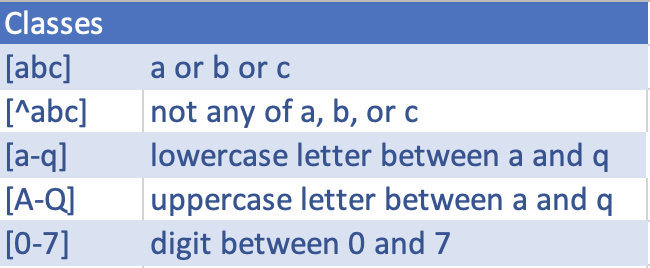
</div>

## Match a semi-structured pattern
But say we'd like to match the words *card*, *care*, or *cart*.

Classes are formed by putting allowable characters inside square brackets, with no commas or spaces separating them.  (If you put a comma or a space inside it will allow matches of commas and spaces!)  Each class stands for ONE character.
* `"car[det]"` will match *card*, *care*, or cart, but will not match carp or cars.

The order of characters inside brackets is not important, but typically they're in alphabetical order
* `"car[det]"` will match the exact same things as `"car[ted]"`

Capitalization matters.
* `"car[det]"` will not match carD, carE, or carT, or Card, Care, or Cart, for that matter.

## Quantifiers
Use quantifiers to specify how many characters you'd like to match. They go immediately after the class or character that you'd like to match and can be interpreted as matching repeated instances of whatever immediately precedes them.

<div>
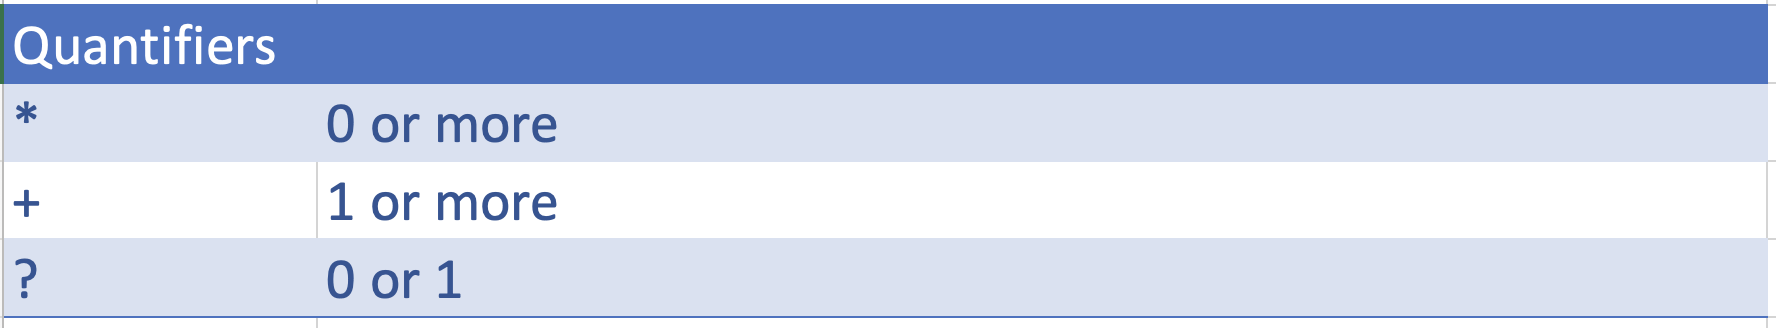
</div>

* `Car[a-z]*` will match any word that starts with Car and is followed by 0 or more letters, so it will match Car, Cars, Carrot, Cares, etc.
* `Car[a-z]+` will match any word that starts with Car and has at least one letter following that, so it will match Cars, Carrot, Cares, etc., but not Car itself.
* `Cars?` will match Car or Cars.

### Exercises

Write the regular expression for the following in the space provided:

`1.` matches *book, boom, brook, or broom*

In [ ]:
exp1 = "br?oo[km]"

In [ ]:
import re
exp1_re = re.compile(exp1)

test1_list = ['book', 'boom', 'brook', 'broom']
for element in test1_list:
    m = exp1_re.search(element)
    if m:
        print(element, 'matches')
    else:
        print(element, 'does not match')

`2.` matches a legal letter grade at BC *(A, A-, B+, B, B-, C+, C, C-, D+, D, D-, F)*

In [ ]:
exp2 = "^(A-?|[B-D][+-]?|F)$"

In [ ]:
exp2_re = re.compile(exp2)

test2_list = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'A+', 'E', 'Fail', 'FF', 'AAA','BB']
for element in test2_list:
    m = exp2_re.search(element)
    if m:
        print(element, 'matches')
    else:
        print(element, 'does not match')

`3.` matches either *Bostonian or Smithsonian*

In [ ]:
exp3 = "(Bost|Smiths)onian"

In [ ]:
exp3_re = re.compile(exp3)

test3_list = ['Bostonian', 'Smithsonian', 'Allstonian']
for element in test3_list:
    m = exp3_re.search(element)
    if m:
        print(element, 'matches')
    else:
        print(element, 'does not match')

## Shortcuts

<div>
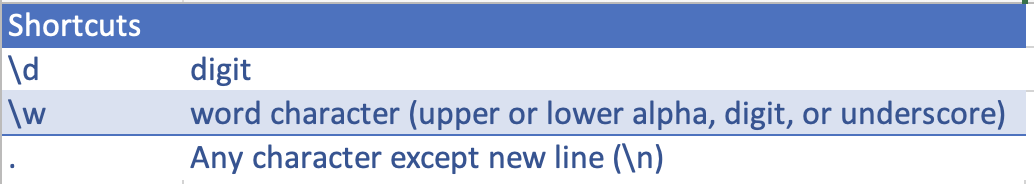
</div>

### Shortcuts for matching characters
There are shortcuts for the most commonly used ranges.  It's best practice to use them if they apply.
* `"\d"` will match any single digit and is equivalent to the class [0-9].  The \d does not go inside brackets.
* `"\w"` will match any single uppercase or lowercase letter and the underscore.  (\w is short for "word character"). It's equivalent to [A-Za-z0-9_]

`"."` (the dot, or period) matches any character at all, except for a line break.  Be sure that that's what you want when you use it!
* `".car"` will match scar, !car, 2car, %car, ;car, etc.

### Combine characters, classes, and shortcuts
To find patterns of more than one character combine characters, classes, and shortcuts.
* `"[A-F][2-8]\d"` will find 3-character sequences that
    * start with a capital letter between A and F, inclusive,
    * have a second character that is a digit between 2 and 8, inclusive
    * have a third character that is any digit.

### Escape special characters

Characters like \*, +, and ? have special meaning in regexes.  So if you want to search for them, you have to type a backslash before them in your regex.

From [this site](https://www.regular-expressions.info/characters.html#special) there are 12 characters with special meanings: the backslash \\, the caret ^, the dollar sign $, the period or dot ., the vertical bar or pipe symbol |, the question mark ?, the asterisk or star *, the plus sign +, the opening parenthesis (, the closing parenthesis ), the opening square bracket \[, and the opening curly brace \{.

* `"\$\d"` matches a dollar sign followed by a single digit.
* `"\*\*"` matches a series of two asterisks.

### Exercises (cont.)
Write the regular expression for the following in the space provided:

`4.` matches 24-hour time...require at least 1 digit before the colon and 2 digits after the colon. For example:

```
It's 0:15 o'clock   # quarter past midnight
It's 0:07 o'clock   # 7 past midnight
It's 4:59 o'clock
It's 12:07 o'clock  # 7 past noon
It's 23:00 o'clock  # 11pm
It's 10:13 o'clock
It's 6:00 o'clock
```
***Note: Your expression should only match the time.***

In [ ]:
exp4 = " (\d|1\d|2[0-3]):[0-5]\d "

In [ ]:
exp4_re = re.compile(exp4)

test4_list = ["It's 0:15 o'clock", "It's 0:07 o'clock", "It's 4:59 o'clock", "It's 12:07 o'clock", 
              "It's 23:00 o'clock", "It's 10:13 o'clock", "It's 6:00 o'clock", "It's 123:00 o'clock", 
              "It's 12:001 o'clock", "It's 25:00 o'clock"]
for element in test4_list:
    m = exp4_re.search(element)
    if m:
        print(element, 'matches')
    else:
        print(element, 'does not match')

`5.` matches a price in US dollars...either of these formats should match:
* `It costs $12.34 per unit   No limit on the dollar amount; 2 digits shown here as an example`
* `It costs $0.75 per unit    Leading zero if less than 1 dollar`

***Note: Your expression should only match the dollar amount.***

In [ ]:
exp5 = " \$([0-9]|[1-9][0-9]+)\.\d\d "

In [ ]:
exp5_re = re.compile(exp5)

test5_list = ['It costs $12.34 per unit', 'It costs $0.75 per unit', 'It costs $1234.56 per unit', 
              'It costs $.56 per unit', 'It costs $0.561 per unit', 'It costs 0.56 per unit', 'It costs 31.48 per unit',
             'It costs $012.56 per unit', 'It costs $12.5 per unit']
for element in test5_list:
    m = exp5_re.search(element)
    if m:
        print(element, 'matches')
    else:
        print(element, 'does not match')

`6.` matches whole numbers that use a comma as the thousands separator...for example:

```
String                     Should it match?
-------------------------------------------
'There are 0 people'            Yes
'There is 1 person'             Yes
'There are 010 people'          No
'There are 243, people'         No
'There are 90 people'           Yes
'There are 100 people'          Yes
'There are 999 people'          Yes
'There are 1,000 people'        Yes
'There are 10,000 people'       Yes
'There are 234,567 people'      Yes
'There are 1,000, people'       No
'There are 1,000,12 people'     No
'There are 1,234,5678 people'   No
'There are 1,234,567 people'    Yes
```

***Note: Your expression should only match the number.***

*Hint: You may find it easier to use the `|` operator when writing this one.*

In [ ]:
# I'm sure there are multiple ways to write this, but here's my solution:

exp6 = " ((\d|[1-9]\d|[1-9]\d\d)(,\d\d\d)*) "

In [ ]:
exp6_re = re.compile(exp6)

test6_list = ['There are 0 people', 'There is 1 person', 'There are 010 people', 'There are 243, people', 
              'There are 90 people', 'There are 100 people', 'There are 999 people', 
              'There are 1,000 people', 'There are 10,000 people', 'There are 243,567 people', 
              'There are 1,000, people', 'There are 1,000,12 people', 'There are 1,234,5678 people',
             'There are 1,234,567 people']
for element in test6_list:
    m = exp6_re.search(element)
    if m:
        print(element, 'matches')
    else:
        print(element, 'does not match')

## If you finish all these exercises...

Check out https://alf.nu/RegexGolf or https://regexcrossword.com (that site has a mobile version for regex fun on the go!).

Check out the Further Resources module in Canvas for links to tutorials and practice exercises for regular expressions.
<div>
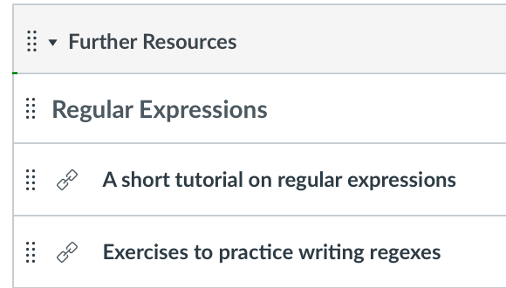
</div>